## Commutation relations

$$\begin{align}
a(\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_+(\nu)a_{in}(\nu)+\epsilon a^\dagger_{in}(-\nu)\right]\\
a^\dagger(-\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_-(\nu)a^\dagger_{in}(-\nu)+\epsilon^* a_{in}(\nu)\right]\\
\left[a_{in}(\nu),a^\dagger_{in}(-\nu^\prime)\right]&=\left(1+\frac{k}{\kappa}\cos{(\phi+\nu\tau)}\right)\delta\left(\nu+\nu^\prime\right)\\
\left[a(\nu),a^\dagger(-\nu^\prime)\right]&=2\frac{\kappa+k\cos{(\phi+\nu\tau)}}{d_+(\nu)d_-(\nu)-|\epsilon|^2}\delta\left(\nu+\nu^\prime\right)\\
\end{align}$$

/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


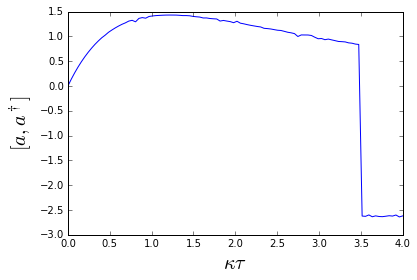

In [24]:
%matplotlib inline
from pylab import *
kappa = 10.*2.*pi
k     = .7*kappa
phi   = 0.2*pi
Delta = .2*kappa
eps   = .7*kappa

def f(nu,ktau):
    tau   = ktau/kappa
    nom   = 2*(kappa+k*cos(phi+nu*tau))
    denom = (kappa-1j*(nu+Delta)+k*exp(1j*(nu*tau-phi)))*(kappa-1j*(nu-Delta)+k*exp(1j*(nu*tau+phi)))-eps**2
    return (nom/denom).real

def fint(ktau):
    return integrate.quad(f, -np.inf, np.inf, args=(ktau))[0]

vec_fint = np.vectorize(fint)
ktauvec = linspace(0,4.,100)

figure(1)
plot(ktauvec, vec_fint(ktauvec))
xlabel('$\kappa\\tau$', fontsize=20)
ylabel('$[a,a^\dagger]$',fontsize=20)
show()

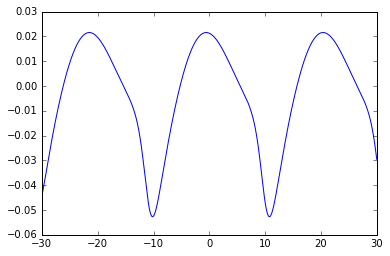

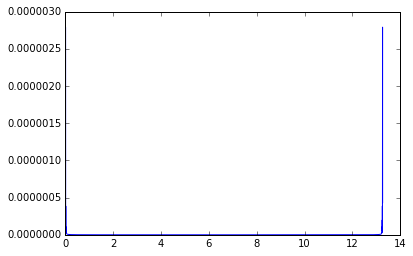

In [43]:
from functools import partial
from scipy.fftpack import fft

N = 10000
space = 60.*pi*2./10000.
fourier = partial(f,3)
figure(1)
nu = linspace(-30*pi*2,30*pi*2,N)
plot(nu/2./pi,fourier(nu))
figure(2)
time = ifft(fourier(nu))
t = linspace(0,1/2/space,N)
plot(t,2/N*abs(time))
show()